### Consigna:
* Graficar una serie de  tiempo de los ejemplos del repositorio

* Redactar un informe describiendo tres series de tiempo distintas(máx.3
páginas)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

##### Catfish.csv: 
Venta de bagres a lo largo del tiempo

In [32]:
catfish = pd.read_csv("./Datasets/catfish.csv",  header=0, index_col=0, parse_dates=True)

In [33]:
catfish.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


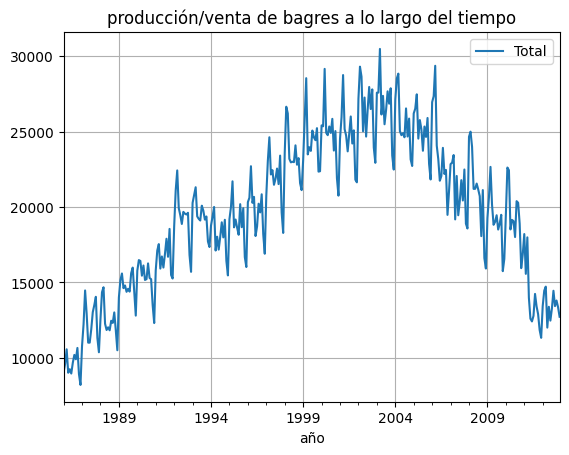

In [34]:
catfish.plot()
plt.title("producción/venta de bagres a lo largo del tiempo")
plt.xlabel("año")
plt.grid(True)

Autocorrelacion
corr(yt,ys) cov(yt, ys) / var(yt) * var(ys) ** 0.5 

cov = 

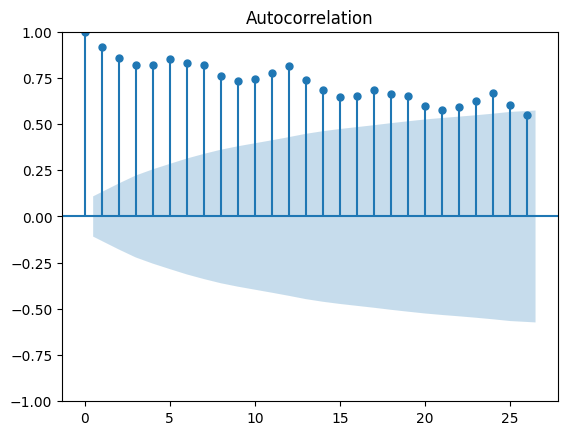

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(catfish)
plt.show()


Se observa que es una serie de tiempo discreta, univariada.

Se observa una autocorrelacion alta. Ciclos con frecuencia determinada.



##### BYMA: cotización de la bolsa de valores de Argentina


In [5]:
byma = pd.read_csv(
    "./Datasets/BYMA.csv",  header=0, index_col=0, 
)

byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)
byma = byma.set_index("fechaHora")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_1178/589893351.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)


<Axes: xlabel='fechaHora'>

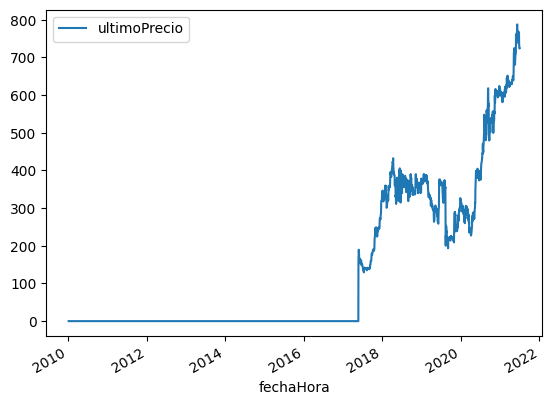

In [7]:
byma.plot()

In [8]:
num_zeros = (byma.ultimoPrecio == 0.0).sum().sum()
num_zeros

1773

In [9]:
# Borramos los que son 0.0
byma = byma[(byma != 0.0).all(axis=1)]
len(byma)

998

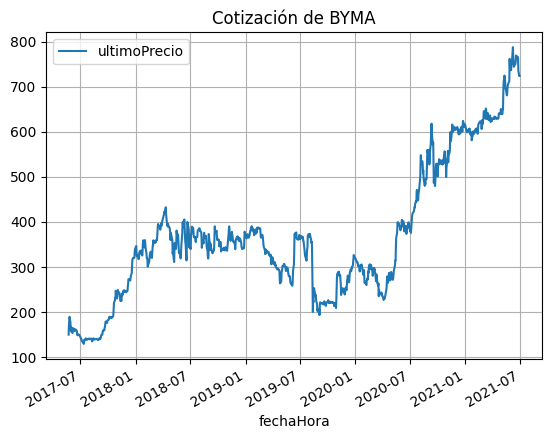

In [10]:
byma.plot()
plt.title("Cotización de BYMA")
plt.grid(True)

Se observa que es una serie de tiempo discreta, univariada, no estacionaria y no estacional.
Se ve  una tendencia alcista apartir de julio 2020.

#### Estadisticas de temperatura



In [16]:
temp = pd.read_csv("./Datasets/new_estadisticas.txt", sep="\t", encoding="latin-1")

In [21]:
temp.columns = ['Estacion', 'Valor Medio de', 'Ene', 'Feb', 'Mar', 'Abr', 'May',
       'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

In [52]:
temp.head()

,Estacion,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBS.,Temperatura (ï¿½C),12.8,12.5,12.4,10.9,6.9,4.4,4.1,6.7,9.3,11.7,12.8,13.2
1,LA QUIACA OBS.,Temperatura mï¿½xima (ï¿½C),20.1,19.9,19.9,19.7,17.3,15.6,15.4,17.4,19.2,21.1,21.7,21.3
2,LA QUIACA OBS.,Temperatura mï¿½nima (ï¿½C),7.4,7.0,6.3,2.8,-3.0,-6.2,-6.8,-4.2,-1.1,2.8,5.2,6.9
3,LA QUIACA OBS.,Humedad relativa (%),65.3,64.1,62.4,48.2,34.6,31.1,30.1,31.7,34.4,45.3,52.3,59.2
4,LA QUIACA OBS.,Velocidad del Viento (km/h),6.9,7.1,6.5,6.4,6.0,4.9,6.6,6.6,8.6,8.7,8.8,8.3


In [63]:
for col in temp.columns[2:]:
    temp[col] = pd.to_numeric(temp[col], errors="coerce")

In [64]:
temp.fillna(np.nan, inplace=True)